In [318]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sac_model import weights_init_
from torch.distributions import Normal
import matplotlib.pyplot as plt

In [319]:
class ThalamoCortical(nn.Module):
    def __init__(self, inp_dim, hid):
        super(ThalamoCortical, self).__init__()
        self.inp_dim = inp_dim
        self.hid = hid

        # Unload fixed weights
        weights = torch.load("checkpoints/thalamocortical_init.pth")

        # Cortical Weights
        self.J_cc = weights["Jcc"]
        self.lick_J_ct = weights["lick_Jct"]

        # Thalamic Weights
        self.lick_J_tc = weights["lick_Jtc"]

        # Thalamic Timescale (not sure what to put)
        self.tau = 1.

        # Readout for probability
        self.W_out = weights["W_out"]

        self.cortical_activity = torch.zeros(size=(hid,))
        self.c_init_mu = torch.zeros(size=(hid,))

    # TODO learn the preparatory weights and add that into the network so that each switch starts with correct initial condition
    def forward(self, x):

        # discrete dynamics with forward euler (dt = 1)
        self.thalamic_activity = self.lick_J_tc @ self.cortical_activity + x
        # make this relu just 0 or 1 instead
        print(self.cortical_activity)
        self.cortical_activity = self.J_cc @ self.cortical_activity + self.lick_J_ct @ self.thalamic_activity
        lick_prob = self.W_out @ self.cortical_activity

        return lick_prob

tensor([0., 0., 0., 0., 0., 0., 0., 0.])
tensor([ 0.0194, -0.0467, -0.0260,  0.0326, -0.0267,  0.0346,  0.0201, -0.0077],
       grad_fn=<AddBackward0>)
tensor([ 0.0360, -0.0936, -0.0591,  0.0464, -0.0161,  0.0740,  0.0750, -0.0469],
       grad_fn=<AddBackward0>)
tensor([ 0.0755, -0.1194, -0.0902,  0.0547,  0.0231,  0.1136,  0.1205, -0.1039],
       grad_fn=<AddBackward0>)
tensor([ 0.1138, -0.1458, -0.1136,  0.0666,  0.0613,  0.1484,  0.1747, -0.1640],
       grad_fn=<AddBackward0>)
tensor([ 0.1529, -0.1682, -0.1370,  0.0776,  0.1014,  0.1822,  0.2288, -0.2270],
       grad_fn=<AddBackward0>)
tensor([ 0.1926, -0.1895, -0.1588,  0.0899,  0.1422,  0.2157,  0.2813, -0.2904],
       grad_fn=<AddBackward0>)
tensor([ 0.2313, -0.2109, -0.1808,  0.1023,  0.1816,  0.2486,  0.3349, -0.3536],
       grad_fn=<AddBackward0>)
tensor([ 0.2704, -0.2320, -0.2027,  0.1150,  0.2216,  0.2818,  0.3875, -0.4170],
       grad_fn=<AddBackward0>)
tensor([ 0.3092, -0.2534, -0.2247,  0.1277,  0.2609,  0.3150,  

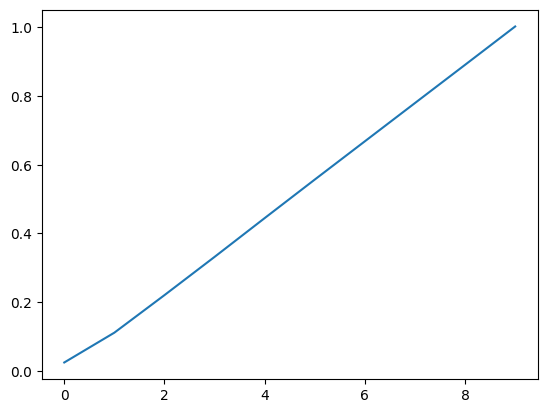

In [320]:
net = ThalamoCortical(1, 8)
test_input_lick = torch.ones(size=(int(1/.1),))*.1

cortical_series = []
for t in range(test_input_lick.shape[0]):
    cortical_out = net(test_input_lick[t])
    cortical_series.append(cortical_out.item())

print(cortical_series)
plt.plot(cortical_series)
plt.show()